In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
import numpy as np
# Load your DataFrame
df = pd.read_csv("archive/synthetic_house_recommendation_data.csv")

# Drop the 'keyword' column from the DataFrame
df = df.drop('latitude', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('house_type', axis=1)
df = df.drop('neighbourhood_quality', axis=1)
df = df.drop('house_condition', axis=1)
df = df.drop('crime_rate', axis=1)
df = df.drop('garden_size', axis=1)
df = df.drop('house_keywords', axis=1)  # replace 'keyword' with the actual column name if different
df = df.drop('Unnamed: 0', axis=1)

# Check for any remaining non-numeric data that might cause issues
print(df.head())
print(df.info())


       price  bedrooms  bathrooms
0  300890.76         7          3
1  272455.06         3          1
2  172964.52         2          2
3  329183.39         2          1
4  739525.34         3          2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      30000 non-null  float64
 1   bedrooms   30000 non-null  int64  
 2   bathrooms  30000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 703.3 KB
None


In [10]:
# Assuming 'df' is your DataFrame
# Columns to be one-hot encoded
categorical_columns = ['house_type', 'neighbourhood_quality', 'house_condition', 'crime_rate']

# Set up OneHotEncoder and ColumnTransformer
encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", encoder, categorical_columns)
], remainder='passthrough')

# Apply encoder to the data
df_encoded_array = transformer.fit_transform(df)

# Accessing categories from the fitted transformer
# Get the encoder and then the categories
fitted_encoder = transformer.named_transformers_['one_hot']
categories = fitted_encoder.categories_

# Creating a flat list of new column names for the categorical variables
category_mapping = [f"{cat}__{subcat}" for cat, sublist in zip(categorical_columns, categories) for subcat in sublist]

# Get names of columns that were not transformed (passthrough)
passthrough_indices = [i for i, col in enumerate(df.columns) if col not in categorical_columns]
passthrough_columns = [df.columns[i] for i in passthrough_indices]

# Combine all column names
all_columns = category_mapping + passthrough_columns

# Create the DataFrame with the appropriate column names
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)  # Ensure to convert sparse matrix to array

# Check the first few rows of the encoded DataFrame
print(df_encoded.head())

ValueError: A given column is not a column of the dataframe

In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)

              price  bedrooms  bathrooms
price      1.000000 -0.004938   0.009061
bedrooms  -0.004938  1.000000  -0.009776
bathrooms  0.009061 -0.009776   1.000000


In [16]:
# Correlation of all features with 'price'
price_correlations = df.corrwith(df['price'])
print(price_correlations)

price        1.000000
bedrooms    -0.004938
bathrooms    0.009061
dtype: float64


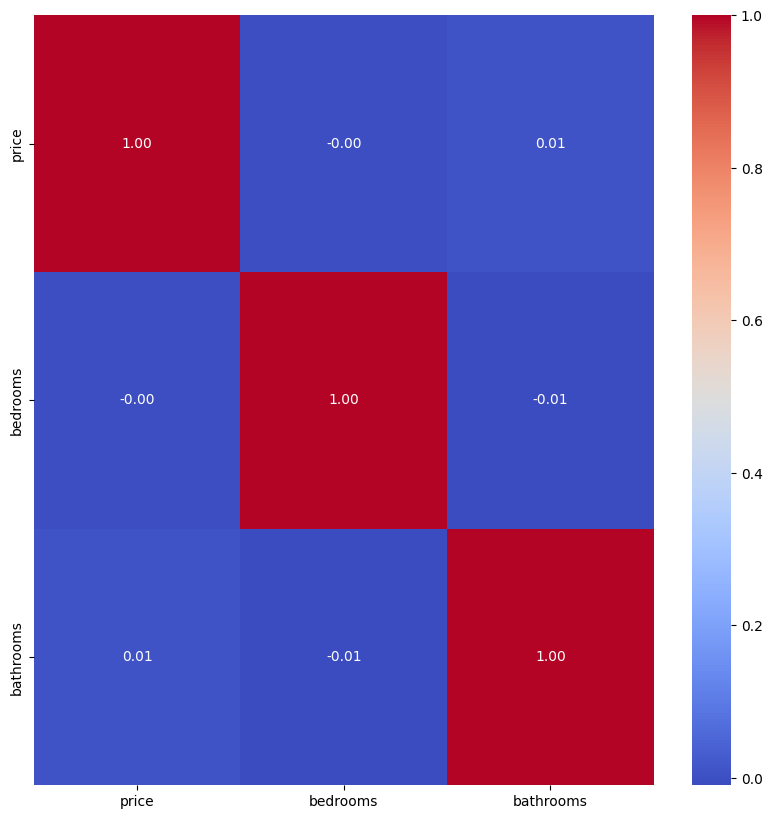

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms'], dtype='object')
